In [1]:
!pip3 install torch torchvision torchaudio
!pip install easyocr

     ---------------------------------------- 2.4/2.4 MB 5.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'bidi.algorithm'

In [3]:
IMAGE_PATH = 'HouseStark.png'

In [4]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(IMAGE_PATH)
result

Using CPU. Note: This module is much faster with a GPU.


[([[938, 322], [1628, 322], [1628, 496], [938, 496]],
  'M ARSAL',
  0.9981077988990832),
 ([[608, 871], [1975, 871], [1975, 1113], [608, 1113]],
  'WINTCRISCONING',
  0.5285299574660542),
 ([[1008, 1183], [1562, 1183], [1562, 1364], [1008, 1364]],
  'STARK',
  0.9732042516270901)]

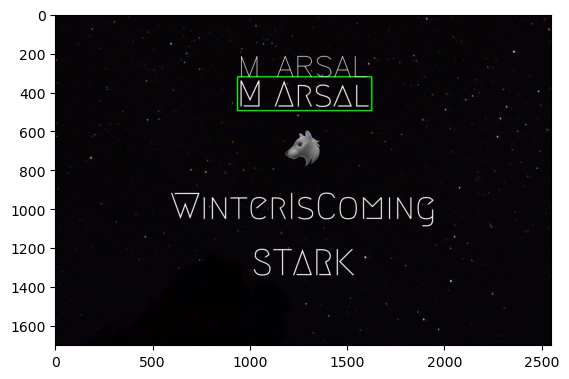

In [6]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 5)
img = cv2.putText(img, text, top_left, font, 5, (255,255,255),2, cv2.LINE_AA)

plt.imshow(img)
plt.show()


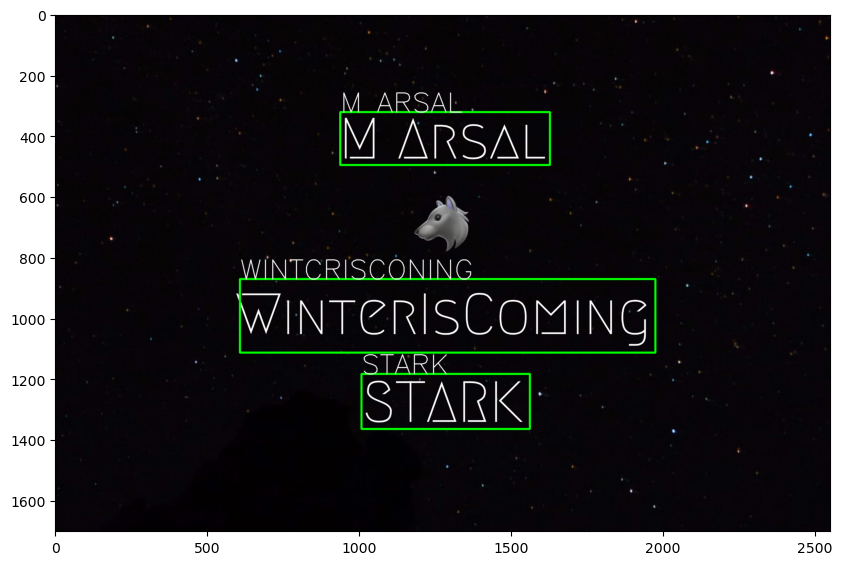

In [9]:
img = cv2.imread(IMAGE_PATH)
for detection in result:
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    text = detection[1]
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 5)
    img = cv2.putText(img, text, top_left, font, 3, (255,255,255),2, cv2.LINE_AA)
    
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()